**Assignment 2: Evaluating Regression Models**

Group 3: Laura Fanelli, Mark Schieble, John Vaughan, Katie Zink

## Data Preparation, Exploration & Visualization

In [1]:
#import packages  
import pandas as pd
import numpy as np
#pip install altair vega_datasets
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data path
path_test = "C:/Users/ly580d/Desktop/Northwestern/7_Practical Machine Learning/Week 2/test.csv"
path_train = "C:/Users/ly580d/Desktop/Northwestern/7_Practical Machine Learning/Week 2/train.csv"

#read data
df_test = pd.read_csv(path_test)
df_train = pd.read_csv(path_train)


In [3]:
#lets take a look at the data
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
#Ensure that the test data is similar to the training set 
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
#the data ID will be used by Keggle to scare the final submission. To retain the ID, we will set the ID as the index
df_test = df_test.set_index('Id') # Set ID as index on the test data 

df_train = df_train.set_index('Id') # Set ID as index on the training data 

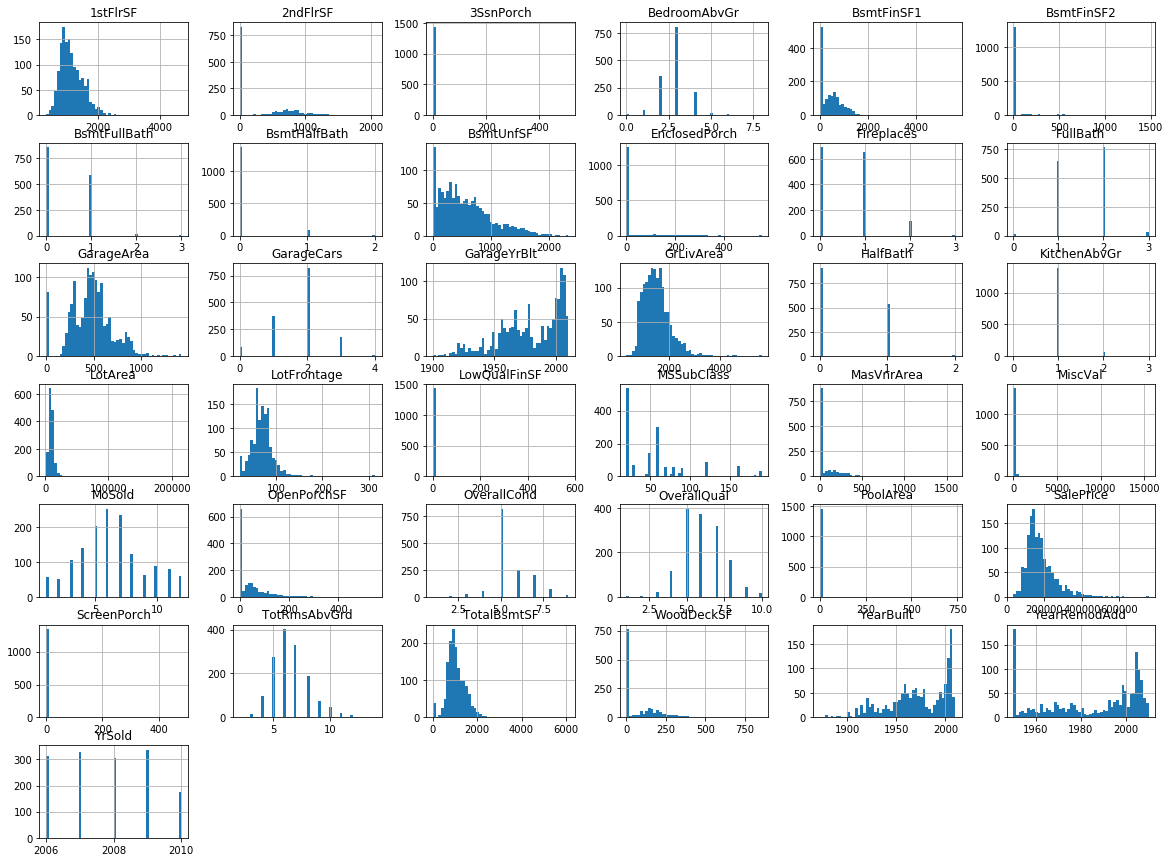

In [6]:
#histogram of each numerical attribute
%matplotlib inline 
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#feature creation - Total Floor SF
df_train['TotalFloorSF']=df_train['1stFlrSF']+df_train['2ndFlrSF']
df_test['TotalFloorSF']=df_test['1stFlrSF']+df_test['2ndFlrSF']

In [8]:
#feature creation - Quality Index
df_train['QualityIndex']=df_train['OverallQual']*df_train['OverallCond']
df_test['QualityIndex']=df_test['OverallQual']*df_test['OverallCond']

In [9]:
# To fix the large number of catagorical variables, we can use SKlearn's label encoder. 
#This takes each catagory and replaces it with a numerical reference. This enables the Algorithm to read the data easier.
def encode_cat_var(df):
    from sklearn.preprocessing import LabelEncoder
    Label_Encoder = LabelEncoder()
    cat_list = df.select_dtypes(include=['object']).columns.tolist()
    for column in cat_list:
        df[column] = Label_Encoder.fit_transform(df[column].astype('str'))
    return df

In [10]:
df_train = encode_cat_var(df_train) #apply to train
df_test = encode_cat_var(df_test) #apply to test

In [11]:
#correlation between each attribute and our response variable SalePrice
corr_matrix = df_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalFloorSF     0.716883
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
QualityIndex     0.565294
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
                   ...   
BsmtCond         0.015058
BsmtFinType2     0.008041
Condition2       0.007513
GarageQual       0.006861
BsmtFinSF2      -0.011378
Utilities       -0.014314
BsmtHalfBath    -0.016844
MiscVal     

In [12]:
# function to fill missing values from list. Note, this was retired in the final version of the notebook
column_list = ['GarageCars']
def fill_missing_values(column_list, df):
    for column in column_list:
        df[column] = df[column].fillna(value=0,inplace=True)
    return df

In [13]:
#clean dataframe function
def clean_df(df):
    assert isinstance(df, pd.DataFrame)
    df.fillna(value=0,inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [14]:
df_train = clean_df(df_train) #apply to train
df_test = clean_df(df_test) #apply to test

## Review research design and modeling methods

In [15]:
#split the data into a test and train datasets. SalePrice is the y variable. 
from sklearn.model_selection import train_test_split

X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice'].values
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [16]:
#To Refine the model, we can adjust the number of features used. However, in adjusting, we only want the most important features.
#We can use a lasso model to rank features, and take only the variables most likely to predict sale price
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01)
model.fit(X_train,y_train)

feature_importance_test = pd.DataFrame(data=model.coef_,
                                       columns=['feature_importance'], 
                                       index = X_train.columns).sort_values(by='feature_importance', 
                                                                            ascending=False)

feature_importance_test = feature_importance_test[feature_importance_test['feature_importance'] != 0] #Note, this can be change to greater or less than 
#feature_importance_test.index.to_list()[:10] # unhide to see top features 

C:\Users\ly580d\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [17]:
#Change the the value as needed - this will directly impact the model features. 
# top_features = feature_importance_test.index.to_list()[:30] 

#original syntax failed for me -- had to convert to list this way 
top_features = feature_importance_test
top_features = top_features.index.tolist()
# top_features

In [18]:
X = df_train[top_features] #Filter out all non top features

In [19]:
#random number generator - to generate the same shuffled indices 
np.random.seed(42)

In [20]:
#test train split for the model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
#Build metrics to evaluate model performance - We will use RSME and R2 Suared 
from sklearn import metrics

def model_evaluation(true, predicted):  
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

## Review Results & Evaluate Models

### Linear Regression

In [22]:
#Linear Regression 

from sklearn.linear_model import LinearRegression

print('Linear Regression Model')

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

model_evaluation(y_test, pred)


Linear Regression Model
RMSE: 32682.185575487514
R2 Square 0.8469316563257491


In [23]:
lin_reg.intercept_, lin_reg.coef_

(553648.6927592955,
 array([ 2.05271539e+04,  1.06647639e+04,  1.61035260e+04,  8.34108324e+03,
         4.05961395e+03,  1.05031914e+04,  2.77210915e+03,  3.40288138e+03,
         2.73633731e+03,  3.80195897e+03,  4.26437851e+03,  4.28866312e+03,
         4.44026532e+03,  4.96313921e+03,  1.35109986e+03,  2.56304652e+03,
         2.05634234e+03,  1.18042558e+03,  5.12218209e+03,  1.01342321e+03,
         3.68508584e+03,  5.46972690e+02,  2.71121489e+02,  7.49700103e+02,
         4.17821934e+02, -1.55585407e+02, -7.01503247e+02,  2.09657437e+02,
        -7.76988762e+13,  4.28254273e+01, -7.76988762e+13,  6.21827855e+01,
         2.90987321e+01,  2.17988425e+01,  1.83196558e+01, -8.13097981e+00,
         3.58019247e+13, -1.48516230e+01, -9.25672214e+13,  2.96719680e+00,
         3.36991212e-01, -9.25672214e+13, -4.91280480e+00,  9.25672214e+13,
        -9.25672214e+13, -8.69956549e+00, -3.58019247e+13,  4.18969515e+13,
        -1.37825887e+03, -5.80750640e+01,  5.66452673e+02, -3.388829

### Linear Regression with Regularization

It is almost preferable to have at least a little bit of regularization. Ridge is a good default, if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features weight down to zero. In general Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongle correlated.

In [28]:
#Ridge using a matrix factorization technique by André-Louis Cholesky

print('Ridge Regression Model with Cholesky technique Alpha = 1')

model_Ridge = Ridge(alpha=1, solver="cholesky")
model_Ridge.fit(X_train, y_train)
pred = model_Ridge.predict(X_test)

model_evaluation(y_test, pred)

Ridge Regression Model with Cholesky technique Alpha = 1
RMSE: 32576.48945350783
R2 Square 0.8479201195239232


In [29]:
print('Ridge Regression Model with Cholesky technique Alpha = 15')

model_Ridge = Ridge(alpha=15, solver="cholesky")
model_Ridge.fit(X_train, y_train)
pred = model_Ridge.predict(X_test)

model_evaluation(y_test, pred)

Ridge Regression Model with Cholesky technique Alpha = 15
RMSE: 32125.13112822326
R2 Square 0.8521051614722613


In [30]:
#Ridge Lasso (Least Absolute Shrinkage and Selection Operator)
#eliminates the weights of the least important features (sets them to 0)
#automatically performs feature selection and outputs sparse model 
from sklearn.linear_model import Lasso
print('Lasso Model')

model_Lasso = Lasso(alpha=0.1)
model_Lasso.fit(X_train, y_train)
pred = model_Lasso.predict(X_test)

model_evaluation(y_test, pred)

Lasso Model
RMSE: 32675.589823535076
R2 Square 0.8469934330357595


C:\Users\ly580d\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [31]:
model_Lasso.intercept_, model_Lasso.coef_

(531693.1912595248,
 array([ 2.06078840e+04,  1.06390503e+04,  1.60695727e+04,  8.37213747e+03,
         4.06614477e+03,  1.05159640e+04,  2.77754887e+03,  3.40070134e+03,
         2.70023516e+03,  3.78096584e+03,  4.24863066e+03,  4.26469499e+03,
         4.40486545e+03,  4.96139789e+03,  1.32585962e+03,  2.55804888e+03,
         2.07508537e+03,  1.17922624e+03,  5.10943430e+03,  1.03445153e+03,
         3.69557018e+03,  5.40049685e+02,  2.77683905e+02,  7.45310027e+02,
         4.16034455e+02, -1.54835653e+02, -6.78804464e+02,  2.10987131e+02,
         4.16777837e+01,  4.26452968e+01,  3.87199188e+01,  6.22306976e+01,
         2.83322005e+01,  2.18820540e+01,  1.82700979e+01, -7.99936108e+00,
        -2.02093013e-01, -1.46362509e+01,  2.18089270e+00,  2.95973412e+00,
         3.37153794e-01,  2.27657858e+00, -4.85248968e+00, -4.70265791e+00,
        -2.95431095e+00, -8.70164827e+00, -3.22699268e-01,  2.84632820e+00,
        -1.36294157e+03, -5.82702663e+01,  5.72265083e+02, -3.389888